# Webscrapping menggunakan BeautifulSoup

Panduan untuk mengambil data kurs harian (US Dolar vs Rupiah) dari sebuah situs.

## Latar Belakang 

Tim Data Analitik ditugaskan untuk mengambil data kurs harian (US Dolar) dari situs www.exchange-rates.org. Exchange-Rates.org adalah sebuah situs yang memiliki fitur untuk memeriksa nilai tukar mata uang asing dengan data yang selalu diperbaharui dan disediakan oleh salah satu perusahaan keuangan terkemuka. Data yang ditampilkan dalam situs tersebut selalu akurat, terpercaya dan mudah dipahami. Pengambilan data kurs harian ini ditujukan untuk pembelajaran dari Tim Data Analitik. Agar data kurs harian dapat diolah dan disajikan dengan baik, maka dapat menggunakan teknik scrapping menggunakan BeautifulSoup.

Langkah-langkah persiapan:
1. Membuka Anaconda Prompt
2. Membuat environment dengan nama capstone1 :
   #### conda create --name casptone1 python=3.10 
   -
3. Mengaktifkan environment:
   #### conda activate casptone1
   -
4. Memasang kernel di dalam environment yang sudah dipersiapkan pada file requirement.txt yang berisikan:
    - beautifulSoup4 
    - pandas 
    - matplotlibs
    
    
   #### pip install -r requirements.txt
   -

5. Setelah selesai instalasi dan masuk melalui jupyter notebook, maka dimulai dengan meminta data ke situs yang dituju menggunakan metode "get"


In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

Setelah mendapatkan data dari situs tersebut melalui "requests.get" maka data yang ditampilkan akan dibatasi sebanyak 500 karakter

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

Data yang ditampilkan diatas rumit dan tidak terstruktur, maka dengan bantuan "BeautifulSoup" akan lebih mudah dipahami

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Menentukan kunci yang tepat untuk menghasilkan data yang akurat

Melalui metode ".find" untuk mencari data yang akurat

In [6]:
table = soup.find('table', attrs={'class':"history-rates-data"})
print(table.prettify()[1:1000])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">
     September 1, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">
     2023-9-1
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      15,258
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      15,258
     </span>
    </span>
   </td>
  </tr>
  <tr class


maka akan didapatkan jumlah barisnya

In [7]:
row = table.find_all('a', attrs={'class':'w'}) 
row_length = len(row)
row_length                

130

Melakukan proses scarpping dengan perintah untuk mendapatkan tanggal dan kurs

In [8]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #perintah untuk mendapatkan tanggal
    tanggal = table.find_all('a', attrs={'class':'n'})[i].text

    #perintah untuk mendapatkan kurs
    kurs = table.find_all('span', attrs={'class':'w'})[i].text 
    kurs = kurs.strip()

    temp.append((tanggal,kurs))
    
temp 

[('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248'),
 ('2023-8-25', '$1 = Rp15,298'),
 ('2023-8-24', '$1 = Rp15,246'),
 ('2023-8-23', '$1 = Rp15,301'),
 ('2023-8-22', '$1 = Rp15,324'),
 ('2023-8-21', '$1 = Rp15,325'),
 ('2023-8-18', '$1 = Rp15,321'),
 ('2023-8-17', '$1 = Rp15,343'),
 ('2023-8-16', '$1 = Rp15,369'),
 ('2023-8-15', '$1 = Rp15,318'),
 ('2023-8-14', '$1 = Rp15,330'),
 ('2023-8-11', '$1 = Rp15,324'),
 ('2023-8-10', '$1 = Rp15,263'),
 ('2023-8-9', '$1 = Rp15,214'),
 ('2023-8-8', '$1 = Rp15,212'),
 ('2023-8-7', '$1 = Rp15,225'),
 ('2023-8-4', '$1 = Rp15,153'),
 ('2023-8-3', '$1 = Rp15,148'),
 ('2023-8-2', '$1 = Rp15,227'),
 ('2023-8-1', '$1 = Rp15,121'),
 ('2023-7-31', '$1 = Rp15,099'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-21', '$1 = Rp15,043'),
 ('2023-7-20', '$

## Membuat Data Frame & Data wrangling

Letakan array pada data frame

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','kurs'))
df.head()

,tanggal,kurs
0,2023-8-31,"$1 = Rp15,225"
1,2023-8-30,"$1 = Rp15,223"
2,2023-8-29,"$1 = Rp15,202"
3,2023-8-28,"$1 = Rp15,248"
4,2023-8-25,"$1 = Rp15,298"


Melakukan pengecekan tipe data, apakah sudah sesuai, untuk format tanggal dan kurs

In [10]:
df.dtypes

tanggal    object
kurs       object
dtype: object

Mengubah format tanggal yang semula object menjadi datetime

In [11]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['kurs'] = df['kurs'].str.replace('$1 = Rp', '',regex=False)
df.dtypes

tanggal    datetime64[ns]
kurs               object
dtype: object

Mengubah format kurs yang semula object menjadi integer

In [12]:
df['kurs'] = df['kurs'].str.replace(',', '',)
df['kurs'] = df['kurs'].astype('Int64')
df.dtypes

tanggal    datetime64[ns]
kurs                Int64
dtype: object

Menampilkan data dalam bentuk grafik

<Axes: xlabel='tanggal'>

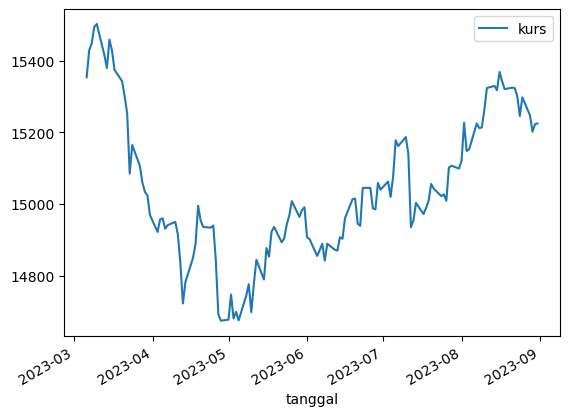

In [13]:
df = df.set_index('tanggal')
df.plot()

### Menampilkan hasil scrapping ke dalam dashboard melalui tool flask

- Mem-copy hasil scrapping di file `app.py`
- Melakukan penyesuain pada file `index.html`

## Analisis dan kesimpulan

In [14]:
df['kurs'].describe()

count           129.0
mean     15042.286822
std        202.866689
min           14674.0
25%           14907.0
50%           15008.0
75%           15202.0
max           15503.0
Name: kurs, dtype: Float64

In [15]:
df_1 = df.reset_index()

In [16]:
df_1.head()

,tanggal,kurs
0,2023-08-31,15225
1,2023-08-30,15223
2,2023-08-29,15202
3,2023-08-28,15248
4,2023-08-25,15298


In [17]:
df_1['tanggal'] = df_1['tanggal'].dt.day_name()

In [18]:
df_1

,tanggal,kurs
0,Thursday,15225
1,Wednesday,15223
2,Tuesday,15202
3,Monday,15248
4,Friday,15298
...,...,...
124,Friday,15503
125,Thursday,15495
126,Wednesday,15449
127,Tuesday,15429


In [19]:
df_1.nunique()

tanggal      5
kurs       115
dtype: int64

1. Nilai kurs terendah pada USD 1 = Rp. 14.674 pada tanggal 28 April 2023
2. Nilai kurs tertinggi pada USD 1 = Rp. 15.503 pada tanggal 10 Maret 2023
3. Hari pertukaran kurs hanya pada 5 hari kerja (Senin-Jumat)
4. Nilai kurs rata-rata sebesar USD 1 = Rp. 15.042